In [9]:
#import data
import pandas as pd
data=pd.read_csv("C:/Users/User/Documents/countries of the world.csv")
data.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [10]:
data.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

Kita ingin menampilkan top 10 negara berdasarkan population

In [11]:
top_population=data.sort_values(by='Population',ascending=False)
top_population_con=top_population[['Country','Population']]
top_population_con.head(10)

,Country,Population
42,China,1313973713
94,India,1095351995
214,United States,298444215
95,Indonesia,245452739
27,Brazil,188078227
156,Pakistan,165803560
16,Bangladesh,147365352
169,Russia,142893540
152,Nigeria,131859731
103,Japan,127463611


Text(0.95, 0.93, 'dalam billion')

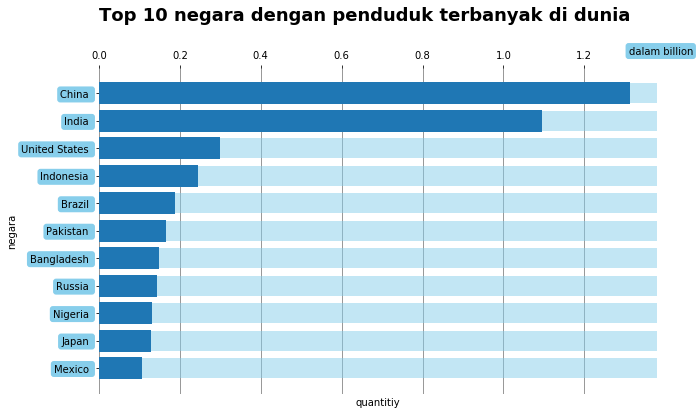

In [12]:
#memilih 10 negara dan sort value berdasarkan kolom
top_ten=top_population_con.iloc[:11,:].sort_values(by='Population')
from matplotlib import pyplot as plt
plt.figure(figsize=(10,6))
#membuat bar chart seacara horizontal
plt.barh(top_ten['Country'],top_ten['Population'])
#memberi nama label dan judul
plt.xlabel('quantitiy')
plt.ylabel('negara')
plt.title('Top 10 negara dengan penduduk terbanyak di dunia',pad=30,loc='left',fontsize=18, fontweight='bold')
#karena kita telah membuat plot, kode ini untuk kustomisasi axes dari plot yang telah kit abuat
ax=plt.gca()
#memindahkan xaxis ke posisi top
ax.xaxis.tick_top()
#membuat grid dan memindahkan ke bagian belakang
ax.grid(axis='x',color='grey')
ax.grid(axis='y',color='skyblue',linewidth=20,alpha=0.5)
ax.set_axisbelow(True)
#menonaktifkan border pada graph
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
#membuat box berwarna pada masing-masing yticks
for i in ax.get_yticklabels():
    i.set_bbox(dict(facecolor='skyblue',edgecolor='none',boxstyle='round,pad=0.3'))
#memindahkan satuan 1e9 ke top corner
ax.xaxis.offsetText.set_visible(False)
plt.figtext(0.95,
            0.93,
            'dalam billion',
            ha='right',
            va='top',
            bbox=dict(facecolor='skyblue',edgecolor='none',boxstyle='round,pad=0.3')
)


    

- China menjadi negara dengan penduduk terbanyak di dunia diikuti India dan Amerika

**selanjutnya kita ingin melihat deathrate and birthrate pada 10 negara dengan populasi terbesar**

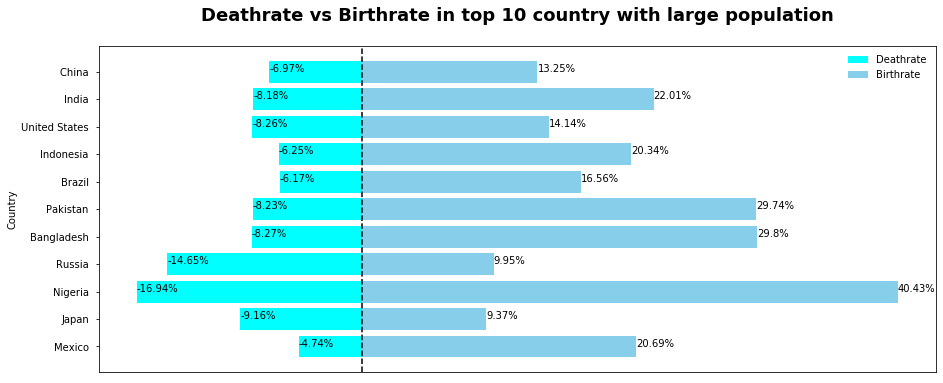

In [13]:
#subset data
top_10=top_population.iloc[:11,:].sort_values(by='Population')
#memngkoversi niali yang memiliki koma menjadi titik dan diubah ke type float
top_10['Deathrate']=top_10['Deathrate'].str.replace(",",".").astype(float)
top_10['Birthrate']=top_10['Birthrate'].str.replace(",",".").astype(float)
import numpy as np
plt.figure(figsize=(15,6))
#membuat bar horizontal
plt.barh(top_10['Country'],-np.array(top_10['Deathrate']),color='cyan',label='Deathrate')
plt.barh(top_10['Country'],top_10['Birthrate'],color='skyblue',label='Birthrate')
#membuat vertical line
plt.axvline(0,color='black',linestyle='--')
#modify dengan menambah bar label
ax=plt.gca()
for i,patch in enumerate(ax.patches):
    nilai=str(patch.get_width())
    plt.text(patch.get_width(),patch.get_y()+patch.get_height()/2,f"{nilai}%")
#menonaktifkan sumbu x
ax.xaxis.set_visible(False)
plt.ylabel('Country')
plt.title('Deathrate vs Birthrate in top 10 country with large population', pad=25, fontweight='bold', fontsize=18)
plt.legend(frameon=False)

- Dalam 10 negara denga populasi terbanuak di dunia presentasei birthrate lebih tinggi dibandingkan dengan death rate
- negara rusia menjadi satu-satunya negara yang presentase deathrate lebih tinggi dibandingkan dengan birthrate
- Negara Jepang menjadi negara dengan presentase Birtrate dan Deathreate hampir sama

**Top 10 GDP negara di dunia**

In [14]:
check_gdp=data.sort_values(by='GDP ($ per capita)',ascending=False)
gdp_con=check_gdp[['Country','GDP ($ per capita)']]
top_gdp=gdp_con.iloc[:10,:].sort_values(by='GDP ($ per capita)',ascending=True)
top_gdp

,Country,GDP ($ per capita)
12,Austria,30000.0
93,Iceland,30900.0
54,Denmark,31100.0
196,Switzerland,32700.0
177,San Marino,34600.0
38,Cayman Islands,35000.0
22,Bermuda,36000.0
154,Norway,37800.0
214,United States,37800.0
121,Luxembourg,55100.0


- Negara luxembourg menjadi negara GDP terbesar di dunia unggul jauh dibandingkan 9 negara lainnya dalam daftar 10 negara terbesar berdasarkan GDP

In [137]:
negara=[i for i in top_gdp['Country']]
#format
kelas=['Agriculture','Industry','Service']
for i in kelas:
   data[i]=data[i].astype('str').str.replace(",",".").astype(float)
   print(data[i].dtypes)
import numpy as np
pie_data=[]
for i in negara:
    ambil=data[data['Country']==i]
    ind=ambil['Industry'].values[0]
    ser=ambil['Service'].values[0]
    ag=ambil['Agriculture'].values[0]
    if np.isnan(ag) and np.isnan(ind) and np.isnan(ser):
        pie_data.append([0.3,0.5,0.2])
    else:
        pie_data.append([ind,ser,ag])


float64
float64
float64


Text(0.55, 0.8, '$ per kapita')

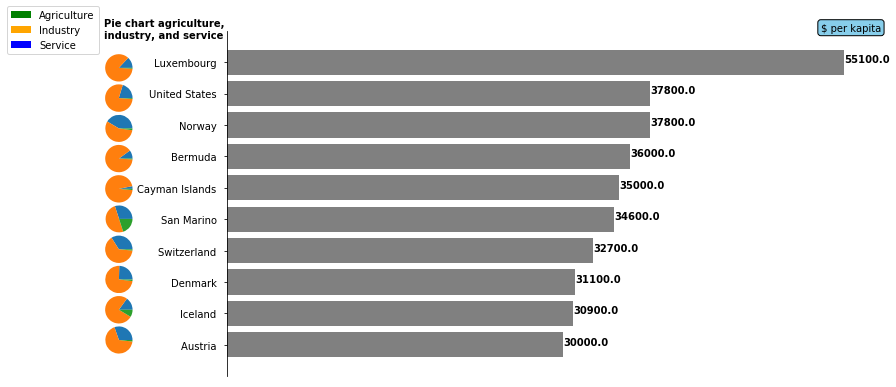

In [136]:
fig=plt.figure(figsize=(15,6))
#kenapa menggunakan plt axes agar 0,0 sama koordinat dengan ax2
ax=plt.axes([0,0,0.6,0.8])
y=[i for i in range(1,11,1)]
ax.barh(top_gdp['Country'],top_gdp['GDP ($ per capita)'],color='grey')
ax.set_ylim(-1,10)
ylim=ax.get_ylim()
xlim=ax.get_xlim()
#menambah text pada setiap bar
for i,j in zip(ax.patches,ax.get_yticks()):
    w=i.get_width()
    plt.text(w,j,f"{w}", fontweight='bold')
#menonaktifkan sumbu
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_visible(False)
#menambah pie chart
#jari-jari pie chart
r=0.04
#tinggi dari figure dikurang jari-jari
height=0.8-r
for i,j,k,l in zip(y,top_gdp['GDP ($ per capita)'],top_gdp['Country'],pie_data):
    #diubah dari koordinat tick ke lim
    norm=(i-1.3-ylim[0])/(ylim[1]-ylim[0])
    ax2=plt.axes([-0.135,norm*0.77,0.07,0.07])
    ambil=data[data['Country']==k]
    
    ax2.pie(l)
    ax2.axis('equal')
#membuat custom legend
import matplotlib.patches as patches
colr_m={
    'Industry':'Orange',
    'Service':'Blue',
    'Agriculture':'Green'
}
legend=[]
for i in kelas:
    leged=patches.Patch(facecolor=colr_m[i],label=i)
    legend.append(leged)
plt.legend(handles=legend,bbox_to_anchor=(0.3,2.7))
#menambah keterangan
plt.text(-1.1,2.2,'Pie chart agriculture,\nindustry, and service',fontweight='bold')
plt.figtext(0.55,0.8,'$ per kapita',bbox=dict(facecolor='skyblue',boxstyle='round'))

- Luksembourg menjadi negara terbesar di kategori GDP 
- Norwegia dan USA memiliki GDP yang sama
- sektor Industri menjadi sektor dominan dari 10 negara GDP terbesar di dunia, diikuti sektor service dan pertanian